In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import os
import seaborn as sns
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
import pims
import pySPM as spm 
import trackpy as tp
import glob
from sxmreader import SXMReader

In [211]:
n_range = range(1, 1+200)
N = len(n_range)
SXM_PATH = ["electromigration_30/Image_{0:03}.sxm".format(i) for i in n_range]
frames = SXMReader(SXM_PATH)
molecule_size = 11
detect_kwargs = {
    'minmass' : 2,
    'maxsize' : 4,
    'separation' : 5,
}
f = tp.batch(frames[:], molecule_size, **detect_kwargs)

Frame 199: 12 features


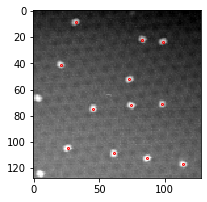

(-0.5, 127.5, 127.5, -0.5)

In [212]:
fig=plt.figure(figsize=(3, 5))
idx = 12
ax = tp.annotate(f[f['frame']==idx], frames[idx], plot_style={'markersize':1})
ax.axis('off')

In [213]:
def gen_hex(a, theta, shift):
    a = a / (frames.meters_per_pixel * 1e9)
    R = lambda o : np.array([
        [np.cos(o * np.pi / 180), -np.sin(o * np.pi / 180)],
        [np.sin(o * np.pi / 180), np.cos(o * np.pi / 180)]
    ])
    a1 = a * np.array([[1, 0]]).T
    a2 = R(120) @ a1
    a1, a2 = R(theta) @ a1, R(theta) @ a2
    x, y = np.arange(25), np.arange(25)
    xv, yv = np.meshgrid(x, y)
    pts = a1 * xv.flatten() + a2 * yv.flatten() + shift.T
    return pts

In [227]:
T = 23 * 8.617e-2
np.exp(- 1 / T)

0.603768894429004

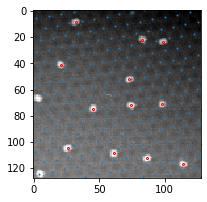

In [215]:
fig, ax =plt.subplots(1, 1, figsize=(3, 5))
idx = 12
tp.annotate(f[f['frame']==idx], frames[idx], plot_style={'markersize':1}, ax=ax)
# ax.axis('off')

pts = gen_hex(3.78, 49.5, np.array([[113, -32]])).T
ax.scatter(pts[:, 0], pts[:, 1], s=1)

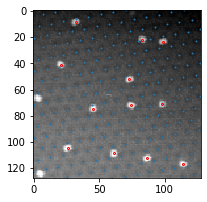

In [216]:
fig, ax =plt.subplots(1, 1, figsize=(3, 5))
idx = 12
tp.annotate(f[f['frame']==idx], frames[idx], plot_style={'markersize':1}, ax=ax)
# ax.axis('off')

pts = gen_hex(3.78, 49.5, np.array([[121, -19]])).T
ax.scatter(pts[:, 0], pts[:, 1], s=1)
for p in pts:
    
    angle = np.linspace( 0 , 2 * np.pi , 150 ) 
    radius = 2
    x = radius * np.cos( angle ) + p[0]
    y = radius * np.sin( angle ) + p[1]
#     ax.plot( x, y, c='r' ) 

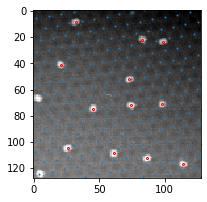

In [217]:
fig, ax =plt.subplots(1, 1, figsize=(3, 5))
idx = 12
tp.annotate(f[f['frame']==idx], frames[idx], plot_style={'markersize':1}, ax=ax)
# ax.axis('off')

high = gen_hex(3.78, 49.5, np.array([[113, -32]])).T
ax.scatter(high[:, 0], high[:, 1], s=1)
for p in high:
    
    angle = np.linspace( 0 , 2 * np.pi , 150 ) 
    radius = 2
    x = radius * np.cos( angle ) + p[0]
    y = radius * np.sin( angle ) + p[1]
#     ax.plot( x, y, c='r' ) 

In [228]:
def near_pit(df, pts):
    df['low'] = False
    for p in pts:
        df['low'] = df['low'] | (((df['x'] - p[0]) ** 2 + (df['y'] - p[1]) ** 2) <= 0.2 ** 2)
    return df
df = near_pit(f, pts)

In [229]:
(df.low == True).sum() / (df.low == False).sum()

0.0

In [230]:
def near_high(df, pts):
    df['high'] = False
    for p in pts:
        df['high'] = df['high'] | (((df['x'] - p[0]) ** 2 + (df['y'] - p[1]) ** 2) <= 0.2 ** 2)
    return df
high = gen_hex(3.78, 49.5, np.array([[113, -32]])).T
df1 = near_high(f, high)
(df1.high == True).sum() / (df.low == True).sum()

/home/a/as/asai/dsgo/trading/trading/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


nan

In [231]:
df1

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,low,high
0,7.982087,31.245410,4.223069,1.975443,0.152972,0.260987,-50.836041,-0.004867,0,False,False
1,20.355425,99.150722,3.538452,1.955272,0.022897,0.225054,-31.667136,-0.005841,0,False,False
2,24.266180,70.936326,3.623556,1.964986,0.171935,0.228836,-22.791123,-0.006438,0,False,False
3,41.246715,21.213625,3.886434,1.995616,0.169291,0.238292,4.131633,-0.009329,0,False,False
4,49.985336,67.869915,3.998015,1.961551,0.180293,0.249640,13.003614,-0.010950,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2597,79.921579,91.023273,13.557883,1.941075,0.144302,0.854013,-1.901276,NaN,199,False,False
2598,104.387999,31.749555,13.489287,2.039216,0.146270,0.775128,14.191264,NaN,199,False,False
2599,112.014004,86.467126,14.449623,2.073306,0.194617,0.840294,11.176557,NaN,199,False,False
2600,117.399855,22.485625,14.195820,2.090025,0.071467,0.775128,17.758958,NaN,199,False,False


In [232]:
df1.high.sum() / df.low.sum()

/home/a/as/asai/dsgo/trading/trading/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


nan

392